In [1]:
import os
import pandas as pd
import unittest

In [3]:
# Define the paths to CSVs and TXTs
PATH = "../" #"../../../desarrollo/"
train_csv_path = PATH + 'Data/Dataset/CSVs/train.csv'
val_csv_path = PATH + 'Data/Dataset/CSVs/validation.csv'
test_csv_path = PATH + 'Data/Dataset/CSVs/test.csv'

train_txt_path = PATH + 'Data/Dataset/TXTs/train.txt'
val_txt_path = PATH + 'Data/Dataset/TXTs/validation.txt'
test_txt_path = PATH + 'Data/Dataset/TXTs/test.txt'

In [49]:
# Load the CSV files into pandas DataFrames
train_df = pd.read_csv(train_csv_path)
val_df = pd.read_csv(val_csv_path)
test_df = pd.read_csv(test_csv_path)

In [41]:
# Extract the paths
train_paths = set(train_df['path'])
val_paths = set(val_df['path'])
test_paths = set(test_df['path'])

# Check for overlaps
train_val_overlap = train_paths.intersection(val_paths)
train_test_overlap = train_paths.intersection(test_paths)
val_test_overlap = val_paths.intersection(test_paths)

# Print the results
if train_val_overlap:
    print("Paths that are in both train and validation sets:", len(train_val_overlap))
else:
    print("No paths overlap between train and validation sets.")

if train_test_overlap:
    print("Paths that are in both train and test sets:", len(train_test_overlap))
else:
    print("No paths overlap between train and test sets.")

if val_test_overlap:
    print("Paths that are in both validation and test sets:", len(val_test_overlap))
else:
    print("No paths overlap between validation and test sets.")


No paths overlap between train and validation sets.
No paths overlap between train and test sets.
No paths overlap between validation and test sets.


In [46]:
# Function to extract image paths from a CSV and save them to a TXT file
def save_image_paths_to_txt(csv_path, txt_path):
    df = pd.read_csv(csv_path)
    paths = df['path']

    #take only unique paths
    paths = paths.unique()

    # Make paths a list
    paths = paths.tolist()
    
    with open(txt_path, 'w') as txt_file:
        for path in paths:
            txt_file.write("Data/Dataset/images/" + path.replace(".WAV", ".PNG") + '\n')

In [47]:
# Save image paths to TXT files
save_image_paths_to_txt(train_csv_path, train_txt_path)
save_image_paths_to_txt(val_csv_path, val_txt_path)
save_image_paths_to_txt(test_csv_path, test_txt_path)

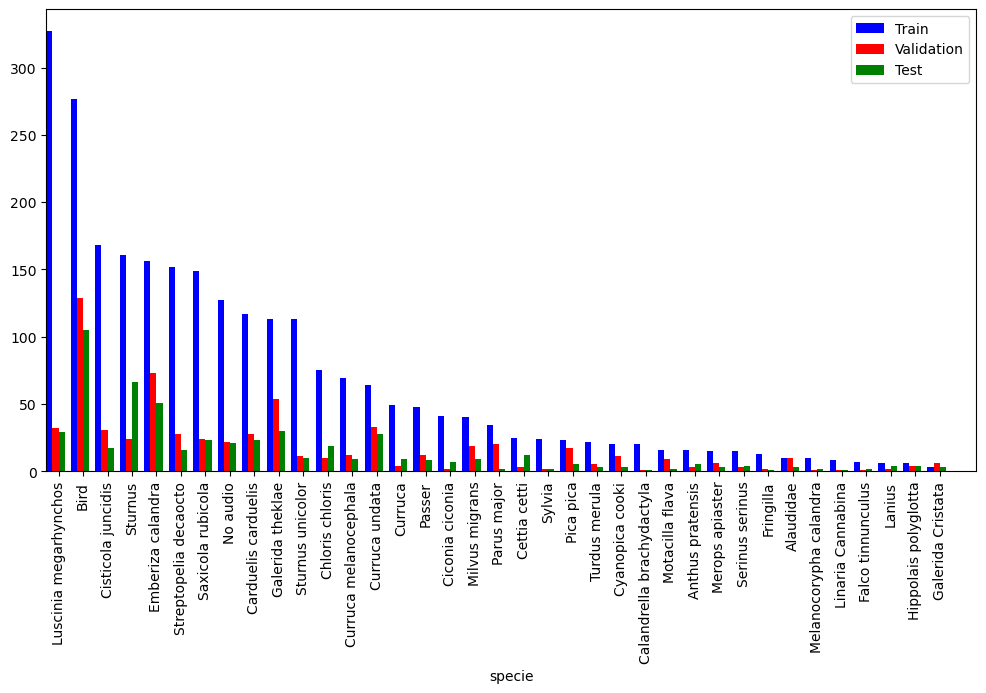

In [50]:
# Count number of instances per specie in each set
train_counts = train_df.groupby('specie').size()
val_counts = val_df.groupby('specie').size()
test_counts = test_df.groupby('specie').size()

# Plot in WIDTHER bar chart
import matplotlib.pyplot as plt

# Order by train number of instances
train_counts = train_counts.sort_values(ascending=False)
val_counts = val_counts[train_counts.index]
test_counts = test_counts[train_counts.index]

# Set figure size
fig, ax = plt.subplots(figsize=(12, 6))  # Ajusta el tamaño de la figura aquí (ancho x alto)
train_counts.plot(kind='bar', ax=ax, color='b', position=2, width=0.25)
val_counts.plot(kind='bar', ax=ax, color='r', position=1, width=0.25)
test_counts.plot(kind='bar', ax=ax, color='g', position=0, width=0.25)

# Ajusta el límite del eje x para que todas las barras sean visibles
ax.set_xlim(-0.5, len(train_counts) + 0.5)

# Add legend
ax.legend(['Train', 'Validation', 'Test'])

plt.show()